In [53]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# make numpy print_outs easier to read
np.set_printoptions(precision=3, suppress=True)

In [54]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [55]:
dataset = pd.read_csv('/home/as2c/Sharif/7th Semester/ML/project_from_scratch/Data Processing/Mined Data/Samples Without Nan - Denc With Nan/All CDM/denc_CDM')

dataset = dataset[dataset.halo_mass > 1500]
dataset.head()

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0
0,8981131,414,1504.0,252.71005,-464.23950,509.94550,-0.104304,-0.029082,-0.005112,0.008240,0.010480,0.008167,0.010448,0.010271,0.010377
4,12884124,437,6128.0,146.78067,-180.20927,-558.39777,-0.096293,-0.056209,-0.018338,-0.008840,-0.005842,-0.001478,-0.000614,0.003277,0.007512
6,2257875,666,9532.0,575.86200,-85.59395,-412.46198,-0.127303,-0.065640,-0.020899,-0.015006,-0.003321,0.006867,0.015352,0.022183,0.021778
8,11109558,369,3092.0,-246.73933,909.41460,-568.12305,-0.081046,-0.050181,-0.023088,-0.007344,0.002319,0.000317,-0.002009,-0.002321,-0.003806
9,6679801,222,2715.0,-70.51831,-158.75307,357.48340,-0.118000,-0.079155,-0.056386,-0.042354,-0.032168,-0.023946,-0.020096,-0.016438,-0.012874


In [56]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.01, random_state= 43)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(62745, 15) (62117, 15) (628, 15)


,count,mean,std,min,25%,50%,75%,max
id,62117.0,8.718506e+06,3.608334e+06,2.131461e+06,5.969371e+06,9.001787e+06,1.201096e+07,1.464620e+07
haloID,62117.0,6.444596e+02,3.592689e+02,1.100000e+01,3.740000e+02,6.800000e+02,9.960000e+02,1.250000e+03
halo_mass,62117.0,4.178574e+03,2.959321e+03,1.504000e+03,2.221000e+03,3.182000e+03,5.008000e+03,3.125200e+04
vx,62117.0,4.222902e+01,3.738682e+02,-1.234874e+03,-2.289860e+02,3.662466e+01,2.992638e+02,1.362094e+03
vy,62117.0,-1.257434e+01,3.826963e+02,-1.571377e+03,-2.573601e+02,-6.135298e-01,2.476055e+02,1.185835e+03
vz,62117.0,1.069141e+02,3.836045e+02,-1.311025e+03,-1.385883e+02,1.129780e+02,3.679354e+02,1.349212e+03
dc for 4.9,62117.0,-1.072756e-01,2.079983e-02,-1.278203e-01,-1.244608e-01,-1.138654e-01,-9.551734e-02,7.852109e-03
dc for 6.8,62117.0,-6.036747e-02,2.091095e-02,-9.957240e-02,-7.623770e-02,-6.175075e-02,-4.706933e-02,3.761617e-02
dc for 8.7,62117.0,-3.546637e-02,1.860968e-02,-8.335055e-02,-4.851572e-02,-3.650051e-02,-2.299503e-02,4.355439e-02
dc for 10.6,62117.0,-2.278377e-02,1.698984e-02,-7.282418e-02,-3.456273e-02,-2.297852e-02,-1.134270e-02,4.234717e-02


In [57]:
# split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_features.pop('haloID')
test_features.pop('haloID')
train_features.pop('id')
test_features.pop('id')

train_labels = train_features.pop('halo_mass')
test_labels = test_features.pop('halo_mass')

In [58]:
def plot(feature1, feature2, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature1], train_features[feature2], label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()

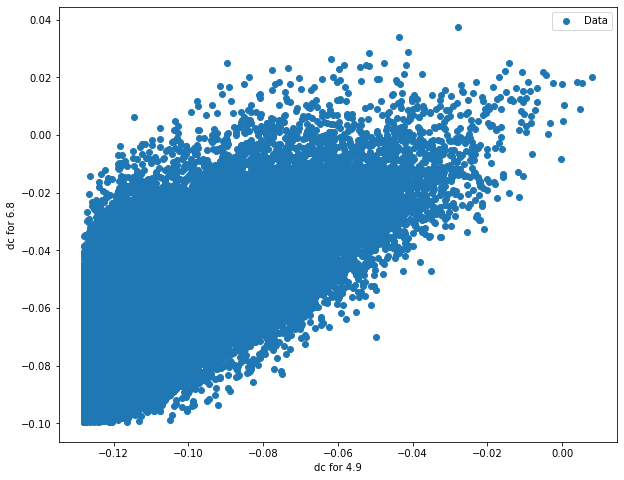

In [59]:
plot('dc for 4.9', 'dc for 6.8')

In [60]:
train_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vx,62117.0,42.229020,373.868198,-1234.874100,-228.986040,36.624660,299.263850,1362.093800
vy,62117.0,-12.574343,382.696279,-1571.376600,-257.360050,-0.613530,247.605530,1185.835400
vz,62117.0,106.914053,383.604488,-1311.024700,-138.588300,112.977980,367.935420,1349.211900
dc for 4.9,62117.0,-0.107276,0.020800,-0.127820,-0.124461,-0.113865,-0.095517,0.007852
dc for 6.8,62117.0,-0.060367,0.020911,-0.099572,-0.076238,-0.061751,-0.047069,0.037616
dc for 8.7,62117.0,-0.035466,0.018610,-0.083351,-0.048516,-0.036501,-0.022995,0.043554
dc for 10.6,62117.0,-0.022784,0.016990,-0.072824,-0.034563,-0.022979,-0.011343,0.042347
dc for 12.4,62117.0,-0.015353,0.015173,-0.065159,-0.025772,-0.015216,-0.004849,0.043754
dc for 14.3,62117.0,-0.010160,0.013557,-0.059339,-0.019314,-0.010133,-0.000797,0.034524
dc for 16.2,62117.0,-0.006136,0.012283,-0.050433,-0.014366,-0.006329,0.002191,0.033084


In [61]:
# todo : vx^2 + vy^2 + vz^2 = v^2
v_squared_train = train_features['vx'] ** 2 + train_features['vy'] ** 2 + train_features['vz'] ** 2
v_squared_test = test_features['vx'] ** 2 + test_features['vy'] ** 2 + test_features['vz'] ** 2
v_squared_train.describe()

count    6.211700e+04
mean     4.467513e+05
std      3.464878e+05
min      3.289182e+02
25%      1.844948e+05
50%      3.643040e+05
75%      6.221219e+05
max      2.871873e+06
dtype: float64

In [62]:
train_features = train_features.drop(['vx' , 'vy', 'vz'], axis = 1)
test_features = test_features.drop(['vx' , 'vy', 'vz'], axis = 1)
train_features

,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0
31263,-0.127820,-0.090530,-0.065840,-0.052262,-0.037336,-0.027484,-0.017832,-0.014069,-0.008906
82485,-0.107146,-0.074293,-0.060065,-0.048727,-0.037005,-0.033983,-0.027364,-0.021877,-0.015933
77144,-0.018766,0.003586,0.001967,-0.001229,-0.005275,-0.007668,-0.002286,-0.001047,-0.001172
87039,-0.086214,-0.059515,-0.039248,-0.014078,-0.004392,0.001029,0.000625,-0.001057,0.001020
3420,-0.124202,-0.080419,-0.060717,-0.056493,-0.046442,-0.042751,-0.033471,-0.024471,-0.016256
...,...,...,...,...,...,...,...,...,...
95110,-0.123686,-0.083724,-0.049680,-0.029687,-0.011135,-0.004315,0.008704,0.021016,0.023226
64791,-0.112832,-0.049208,-0.043440,-0.040368,-0.039100,-0.038089,-0.029257,-0.018438,-0.006550
81819,-0.037114,-0.017220,-0.011772,-0.015987,-0.015058,-0.011020,-0.007846,-0.006516,-0.006071
31327,-0.111798,-0.059126,-0.018943,-0.004041,0.001736,-0.000323,0.000006,0.004745,0.004171


In [63]:
v_squared_train

31263    239795.819148
82485    298205.597516
77144    565898.238239
87039    938088.266089
3420     264295.393841
             ...      
95110    240565.641497
64791    279105.346986
81819    265885.736632
31327    191791.267116
22482     66862.346887
Length: 62117, dtype: float64

In [64]:
train_features['v^2'] = v_squared_train
test_features['v^2'] = v_squared_test

In [65]:
train_features

,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,v^2
31263,-0.127820,-0.090530,-0.065840,-0.052262,-0.037336,-0.027484,-0.017832,-0.014069,-0.008906,239795.819148
82485,-0.107146,-0.074293,-0.060065,-0.048727,-0.037005,-0.033983,-0.027364,-0.021877,-0.015933,298205.597516
77144,-0.018766,0.003586,0.001967,-0.001229,-0.005275,-0.007668,-0.002286,-0.001047,-0.001172,565898.238239
87039,-0.086214,-0.059515,-0.039248,-0.014078,-0.004392,0.001029,0.000625,-0.001057,0.001020,938088.266089
3420,-0.124202,-0.080419,-0.060717,-0.056493,-0.046442,-0.042751,-0.033471,-0.024471,-0.016256,264295.393841
...,...,...,...,...,...,...,...,...,...,...
95110,-0.123686,-0.083724,-0.049680,-0.029687,-0.011135,-0.004315,0.008704,0.021016,0.023226,240565.641497
64791,-0.112832,-0.049208,-0.043440,-0.040368,-0.039100,-0.038089,-0.029257,-0.018438,-0.006550,279105.346986
81819,-0.037114,-0.017220,-0.011772,-0.015987,-0.015058,-0.011020,-0.007846,-0.006516,-0.006071,265885.736632
31327,-0.111798,-0.059126,-0.018943,-0.004041,0.001736,-0.000323,0.000006,0.004745,0.004171,191791.267116


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_features)
train = scaler.transform(train_features)
test = scaler.transform(test_features)

In [67]:
train.shape

(62117, 10)

In [68]:
train

array([[-0.988, -1.442, -1.632, ..., -1.001, -0.855, -0.597],
       [ 0.006, -0.666, -1.322, ..., -1.698, -1.543, -0.429],
       [ 4.255,  3.058,  2.012, ...,  0.162, -0.098,  0.344],
       ...,
       [ 3.373,  2.063,  1.273, ..., -0.327, -0.578, -0.522],
       [-0.217,  0.059,  0.888, ...,  0.679,  0.425, -0.736],
       [ 1.808,  2.152,  2.55 , ...,  1.75 ,  1.761, -1.096]])

In [100]:
from keras import backend as K
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

loss = keras.losses.MeanAbsoluteError()  # MeanSquaredError
learning_rate = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= 0.001,
    decay_steps=100000,
    decay_rate=0.001
)
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

dnn_model = keras.Sequential([
    layers.Dense(128, input_shape=(10,), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=1)
])

dnn_model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[coeff_determination],
)

In [70]:
scaler = StandardScaler()
train_labels = train_labels.values.reshape(-1, 1)
test_labels = test_labels.values.reshape(-1, 1)
scaler.fit(train_labels)
train_labels_normalized = scaler.transform(train_labels)
test_labels_normalized = scaler.transform(test_labels)

In [101]:
history = dnn_model.fit(
    train, train_labels_normalized,
    epochs=400,
    verbose=1,
    batch_size=128,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2,
    shuffle=True
)

Epoch 1/400
389/389 [==============================] - 6s 13ms/step - loss: 0.5770 - coeff_determination: 0.1847 - val_loss: 0.5720 - val_coeff_determination: 0.2124
Epoch 2/400
389/389 [==============================] - 6s 16ms/step - loss: 0.5592 - coeff_determination: 0.2306 - val_loss: 0.5599 - val_coeff_determination: 0.2339
Epoch 3/400
389/389 [==============================] - 4s 9ms/step - loss: 0.5515 - coeff_determination: 0.2456 - val_loss: 0.5565 - val_coeff_determination: 0.2305
Epoch 4/400
389/389 [==============================] - 5s 13ms/step - loss: 0.5473 - coeff_determination: 0.2521 - val_loss: 0.5519 - val_coeff_determination: 0.2576
Epoch 5/400
389/389 [==============================] - 5s 12ms/step - loss: 0.5425 - coeff_determination: 0.2602 - val_loss: 0.5416 - val_coeff_determination: 0.2902
Epoch 6/400
389/389 [==============================] - 5s 13ms/step - loss: 0.5381 - coeff_determination: 0.2686 - val_loss: 0.5308 - val_coeff_determination: 0.3079
Epoch

KeyboardInterrupt: 

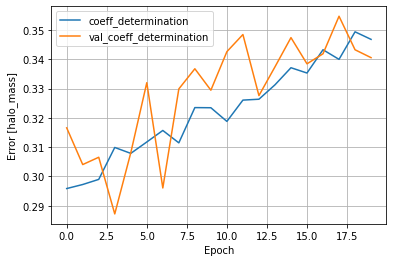

In [106]:
def plot_r2(history):
    plt.plot(history.history['coeff_determination'], label = 'coeff_determination')
    plt.plot(history.history['val_coeff_determination'], label='val_coeff_determination')
    # plt.ylim([1200, 1400])
    plt.xlabel('Epoch')
    plt.ylabel('Error [halo_mass]')
    plt.legend()
    plt.grid(True)

plot_r2(history)

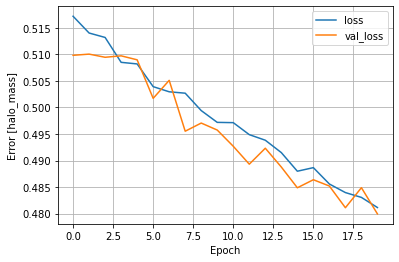

In [107]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([1200, 1400])
    plt.xlabel('Epoch')
    plt.ylabel('Error [halo_mass]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

testing on 0.01 of the data After training

In [108]:
dnn_model.evaluate(
    test,
    test_labels_normalized, verbose = 1
)

20/20 [==============================] - 0s 2ms/step - loss: 0.4624 - coeff_determination: 0.3740


[0.4623904824256897, 0.374001145362854]

Tuning The Model

In [109]:
from kerastuner.tuners import RandomSearch

In [163]:
dataset_v = dataset.drop(['vx', 'vy', 'vz', 'id', 'haloID'], axis=1)
dataset_v['v^2'] = dataset['vx'] ** 2 + dataset['vy'] ** 2 + dataset['vz'] ** 2
train_dataset, test_dataset = train_test_split(dataset_v, test_size=0.2, random_state= 43)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(62745, 15) (50196, 11) (12549, 11)


,count,mean,std,min,25%,50%,75%,max
halo_mass,50196.0,4176.630528,2958.632079,1504.000000,2221.000000,3182.000000,5008.000000,3.125200e+04
dc for 4.9,50196.0,-0.107220,0.020857,-0.127820,-0.124461,-0.113865,-0.095259,7.852109e-03
dc for 6.8,50196.0,-0.060340,0.020944,-0.099572,-0.076238,-0.061654,-0.046972,3.401874e-02
dc for 8.7,50196.0,-0.035446,0.018619,-0.083351,-0.048469,-0.036477,-0.022995,4.290240e-02
dc for 10.6,50196.0,-0.022769,0.016995,-0.072824,-0.034537,-0.022953,-0.011291,4.234717e-02
dc for 12.4,50196.0,-0.015343,0.015168,-0.065159,-0.025724,-0.015216,-0.004833,4.375428e-02
dc for 14.3,50196.0,-0.010158,0.013543,-0.058720,-0.019314,-0.010123,-0.000818,3.452373e-02
dc for 16.2,50196.0,-0.006134,0.012262,-0.049957,-0.014337,-0.006322,0.002170,3.287723e-02
dc for 18.1,50196.0,-0.002856,0.011179,-0.042834,-0.010410,-0.003365,0.004834,3.412503e-02
dc for 20.0,50196.0,-0.000176,0.010198,-0.035228,-0.007147,-0.000747,0.006912,3.342270e-02


Normalizing the Data

In [164]:
train_labels = train_dataset.pop('halo_mass').values.reshape(-1, 1)
train_features = train_dataset.copy()
test_labels = test_dataset.pop('halo_mass').values.reshape(-1, 1)
test_features = test_dataset

In [165]:
scaler = StandardScaler()
scaler.fit(train_features)
train_features_normalized = scaler.transform(train_features)
test_features_normalized = scaler.transform(test_features)
scaler.fit(train_labels)
train_labels_normalized = scaler.transform(train_labels)
test_labels_normalized = scaler.transform(test_labels)

In [166]:
scaler = StandardScaler()
scaler.fit(train_features)
train = scaler.transform(train_features)
test = scaler.transform(test_features)

In [167]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step = 32),
                                            activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
            loss = 'mean_absolute_error',
            metrics=['mean_absolute_error', coeff_determination]
    )
    return model

In [174]:
tuner = RandomSearch(
    build_model,
    objective='mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    project_name='Density Contrast Parameters'
)

INFO:tensorflow:Reloading Oracle from existing project ./Density Contrast Parameters/oracle.json
INFO:tensorflow:Reloading Tuner from ./Density Contrast Parameters/tuner0.json


In [175]:
tuner.search_space_summary()

Search space summary
Default search space size: 22
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [176]:
print(test_features_normalized.transpose().shape)
print(test_labels_normalized.shape)

(10, 12549)
(12549, 1)


In [177]:
tuner.search(train_features_normalized, train_labels_normalized,
             epochs=5,
             validation_data = (test_features_normalized, test_labels_normalized))

INFO:tensorflow:Oracle triggered exit


In [178]:
tuner.results_summary()

Results summary
Results in ./Density Contrast Parameters
Showing 10 best trials
Objective(name='mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 256
units_1: 64
learning_rate: 0.001
units_2: 256
units_3: 352
units_4: 448
units_5: 480
units_6: 320
units_7: 64
units_8: 512
units_9: 320
units_10: 512
units_11: 320
units_12: 64
units_13: 416
units_14: 448
units_15: 480
units_16: 128
units_17: 64
units_18: 32
Score: 0.518230676651001
Trial summary
Hyperparameters:
num_layers: 10
units_0: 288
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
Score: 0.5269128481547037
Trial summary
Hyperparameters:
num_layers: 19
units_0: 128
units_1: 160
learning_rate: 0.001
units_2: 480
units_3: 224
units_4: 352
units_5: 32
units_6: 64
units_7: 448
units_8: 64
units_9: 512
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 

The Best Values for this model are:<br>
learning_rate = 0.001 <br>
loss = 0.518 <br>

Now we can use the model to draw what the predicted halo mass values:

In [214]:
mass_true = dataset_v['halo_mass']
features = dataset_v.drop(['halo_mass'], axis=1)

In [215]:
mass_pred = dnn_model.predict(features)

In [216]:
mass_pred_df = pd.DataFrame(mass_pred, columns = ['halo_mass'])

In [217]:
mass_pred_df

,halo_mass
0,27559.837891
1,18690.228516
2,26008.806641
3,61856.304688
4,8070.036133
...,...
62740,9308.383789
62741,22293.017578
62742,31715.501953
62743,26604.626953


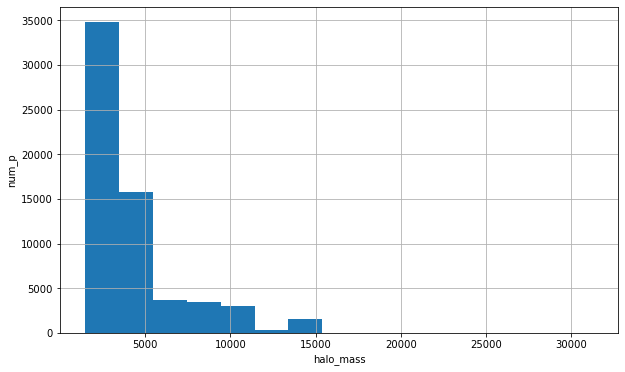

In [218]:
plt.figure(figsize=(10, 6))
hist_plot = mass_true.hist(bins=15)
plt.xlabel('halo_mass')
plt.ylabel('num_p')
plt.show()

<Figure size 720x432 with 0 Axes>

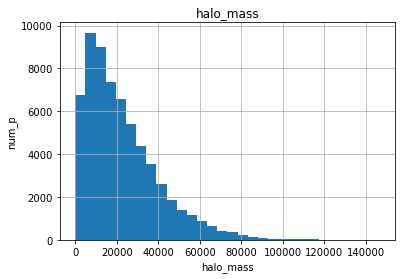

In [222]:
plt.figure(figsize=(10, 6))
hist_plot = mass_pred_df.hist(bins=30)
plt.xlabel('halo_mass')
plt.ylabel('num_p')
plt.show()